In [2]:
import pandas as pd
filename = '미니프로젝트-쇼핑몰 실습데이터.xlsx'

df = pd.read_excel(filename, engine='openpyxl')

In [25]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [3]:
# 비어있는 값 또는 '-' 기호를 '기타'로 대체

df['결제방법'] = df['결제방법'].replace({'-': '기타', '': '기타', ' + 포': '기타'}).fillna('기타')


In [4]:
#'결제방법' 데이터에서 '+' 기호를 포함한 경우 첫번째 단어만 사용
# 각 결제방법별로 총 판매금액을 계산

df['결제방법'] = df['결제방법'].apply(lambda x: x.split('+')[0].strip())

# 각 결제방법별 총 판매금액 계산
payment_analysis = df.groupby('결제방법')['판매금액'].sum().reset_index()

print(payment_analysis)

      결제방법        판매금액
0     가상계좌     2079090
1       기타  1136994130
2    무통장입금       87150
3        신  1730890287
4     신용카드  5498773848
5     웰컴마일   108139095
6        적    32402285
7      적립금    17312560
8        정   361054000
9     정기결제  1129839200
10     포인트   618818225
11       현    99058865
12  현금간편결제   307244900
13       후   128784000
14      후불   361695000


In [32]:
output_filename = "결제방법별_판매금액.xlsx"
payment_analysis.to_excel(output_filename, index=False, engine='openpyxl')

print(f"{output_filename}로 저장되었습니다.")

결제방법별_판매금액.xlsx로 저장되었습니다.


In [5]:
# '결제방법' 컬럼의 값을 다른 값으로 대체하는 조건들
replace_conditions = {
    '신': '신용카드', 
    '정': '정기결제', 
    '후': '후불',
    '적': '적립금',
    '현': '현금'
}

# '결제방법' 컬럼의 값 대체
df['결제방법'] = df['결제방법'].replace(replace_conditions)

# 다시 '결제방법'별로 판매금액을 집계
grouped_data = df.groupby('결제방법')['판매금액'].sum().reset_index()

print(grouped_data)


      결제방법        판매금액
0     가상계좌     2079090
1       기타  1136994130
2    무통장입금       87150
3     신용카드  7229664135
4     웰컴마일   108139095
5      적립금    49714845
6     정기결제  1490893200
7      포인트   618818225
8       현금    99058865
9   현금간편결제   307244900
10      후불   490479000


In [39]:
# 엑셀 파일로 저장
output_filename = "결제방법별_판매금액2.xlsx"
grouped_data.to_excel(output_filename, index=False, engine='openpyxl')

print(f"{output_filename}로 저장되었습니다.")


결제방법별_판매금액2.xlsx로 저장되었습니다.


In [6]:
sorted_data = grouped_data.sort_values(by='판매금액', ascending=False)
sorted_data

,결제방법,판매금액
3,신용카드,7229664135
6,정기결제,1490893200
1,기타,1136994130
7,포인트,618818225
10,후불,490479000
9,현금간편결제,307244900
4,웰컴마일,108139095
8,현금,99058865
5,적립금,49714845
0,가상계좌,2079090


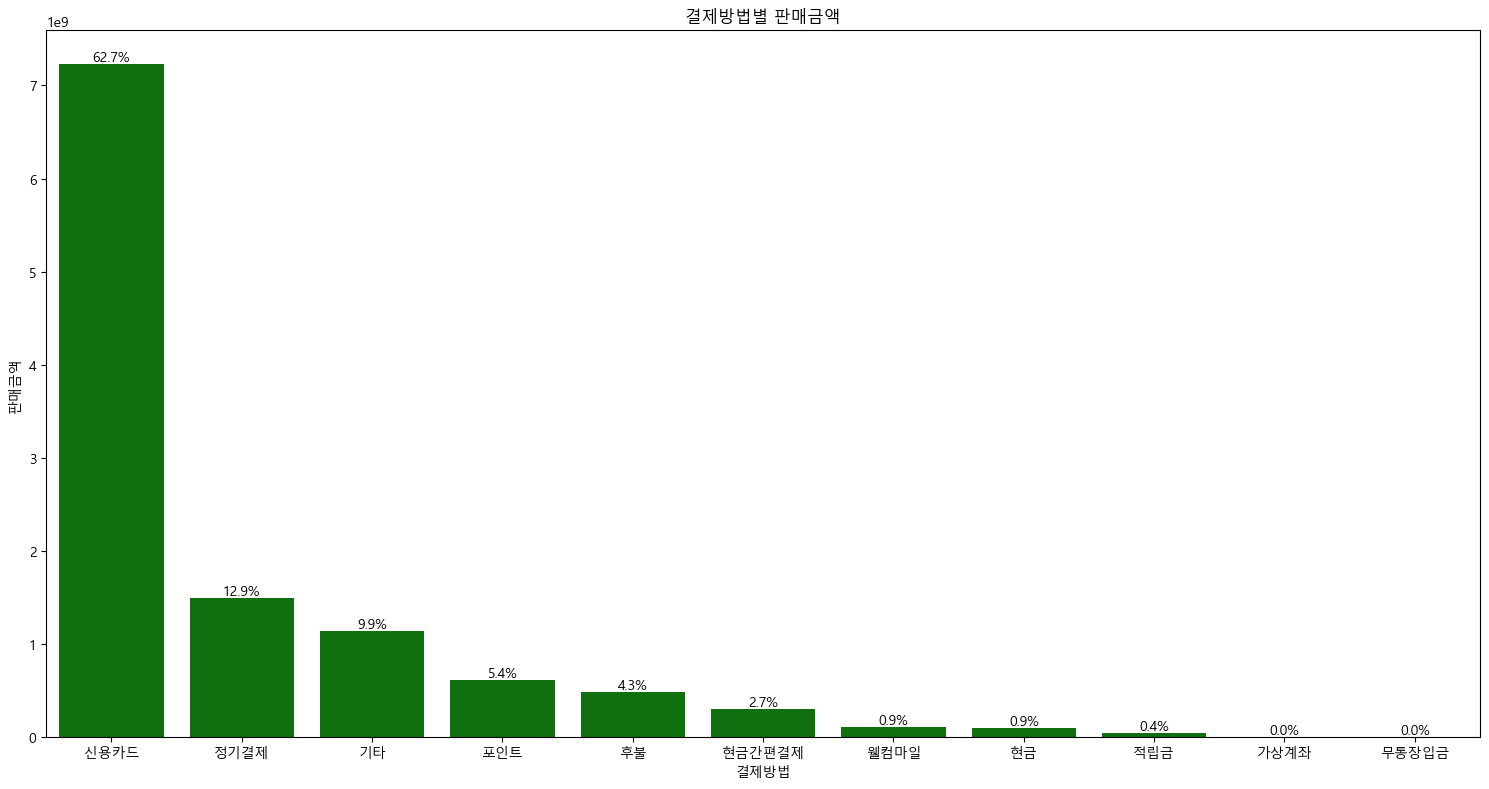

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 판매금액 계산
total_sales = sorted_data['판매금액'].sum()

# 데이터를 '판매금액' 기준으로 내림차순 정렬
sorted_data = sorted_data.sort_values(by='판매금액', ascending=False)

# 바 차트 그리기
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='결제방법', y='판매금액', data=sorted_data, color='green')

# 각 막대의 상단에 퍼센트 표시
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_sales)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# 그래프 설정
plt.title('결제방법별 판매금액')
plt.xlabel('결제방법')
plt.ylabel('판매금액')
# plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [12]:
plt.rc('font', family='Malgun Gothic')  # 윈도우를 사용하고 있을 떄

# 한글 기호가 보이게되면, - (마이너스) 기호가 깨진다.

# 마이너스 기호 문제 해결하기
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [48]:
# '처리상태'가 '구매확정'인 데이터만 추출
confirmed_data = df[df['처리상태'] == '구매확정']

# '결제방법'별 '판매금액' 집계
grouped_confirmed_data = confirmed_data.groupby('결제방법')['판매금액'].sum().reset_index().sort_values(by='판매금액', ascending=False)

grouped_confirmed_data

,결제방법,판매금액
2,신용카드,4687854783
5,정기결제,1256518000
1,기타,1011025800
6,포인트,486920060
9,후불,377088000
8,현금간편결제,147256560
3,웰컴마일,92798695
7,현금,60791975
4,적립금,43975975
0,가상계좌,339990


In [49]:
# 엑셀 파일로 저장
output_filename = "구매확정인_결제방법별_판매금액.xlsx"
grouped_confirmed_data.to_excel(output_filename, index=False, engine='openpyxl')

print(f"{output_filename}로 저장되었습니다.")

구매확정인_결제방법별_판매금액.xlsx로 저장되었습니다.


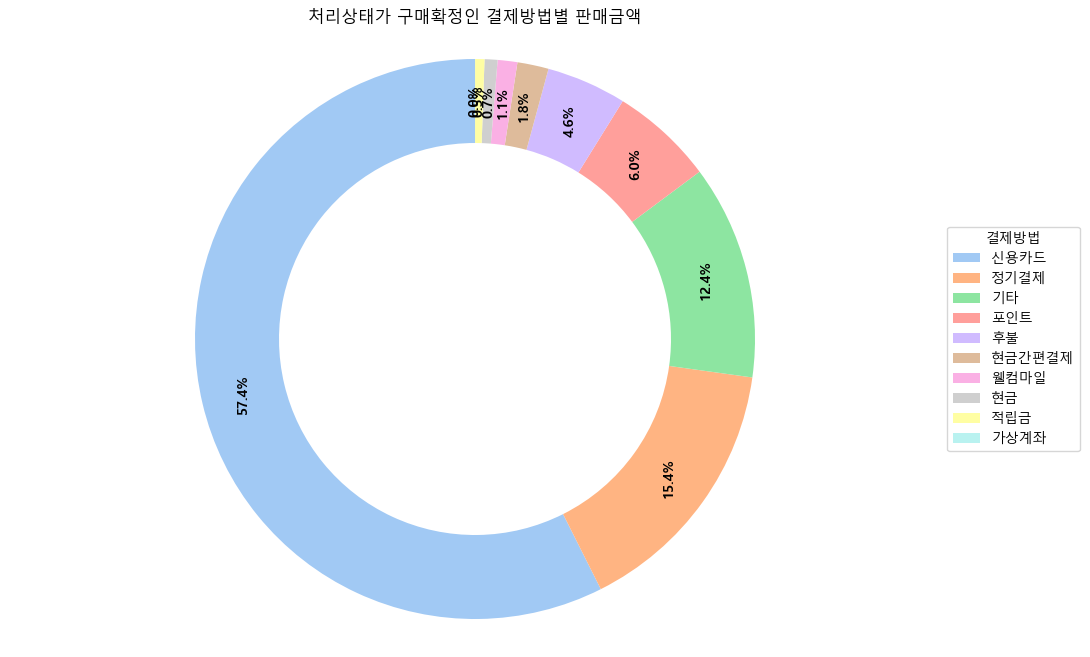

In [59]:
import matplotlib.pyplot as plt

# 데이터 설정
sizes = grouped_confirmed_data['판매금액']
colors = sns.color_palette('pastel', len(grouped_confirmed_data['결제방법']))

# 도넛 차트 그리기
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, 
                                  wedgeprops=dict(width=0.3), pctdistance=0.85)

# 퍼센트 텍스트 설정: 바깥쪽 위치, 크기, 두께, 회전
plt.setp(autotexts, size=10, weight="bold", rotation=90)

# 레이블 및 제목 설정
ax.legend(wedges, grouped_confirmed_data['결제방법'], title="결제방법", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('처리상태가 구매확정인 결제방법별 판매금액')

# 도넛 차트 출력
ax.axis('equal')
plt.show()



C:\Users\Estar\AppData\Local\Temp\ipykernel_99784\1956199317.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")


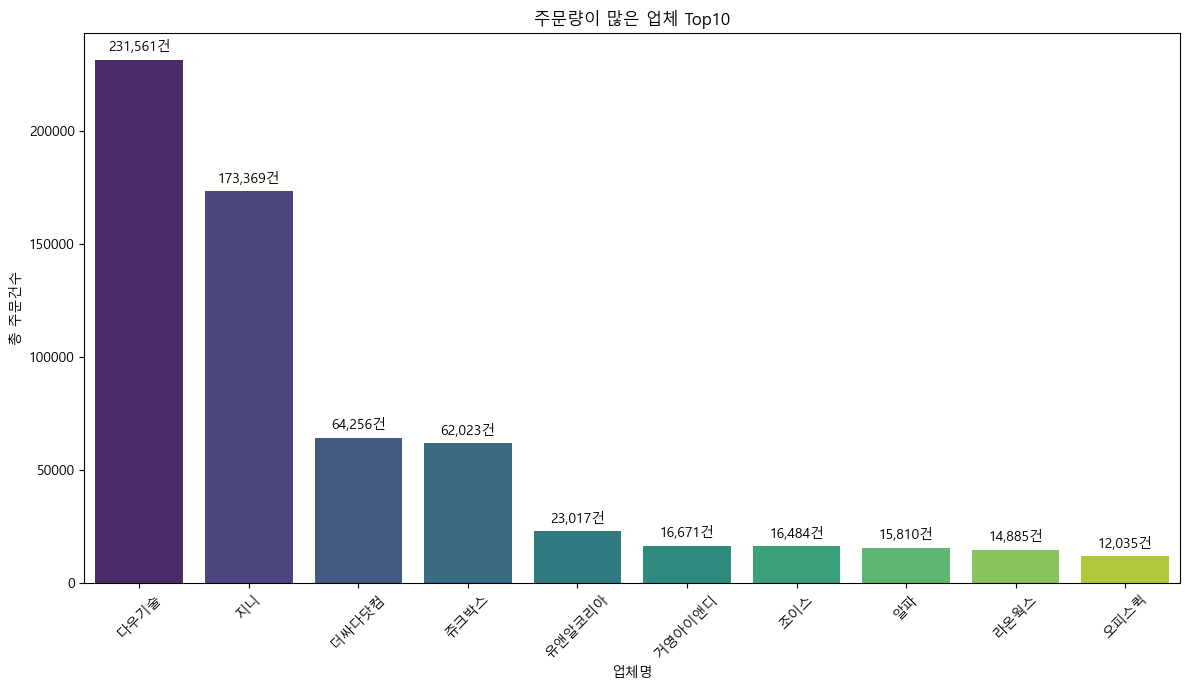

In [87]:
# #어느업체가 중요한지 -> 한 업체의 주문수량의 합산 (F:얼마나 자주)

# company=df['주문수량'].groupby(df['업체명']).sum()
# company_as=company.sort_values()
# pd.DataFrame(company_as)

# #시각화
# plt.subplots(figsize=(4,2.5))
# plt.hist(company_as)
# plt.xlabel('업체명')
# plt.ylabel('총 주문수량')
# plt.rc('font', family='Malgun Gothic')
# plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# '업체명'으로 그룹화하고 '주문수량'을 합산
grouped_company = df.groupby('업체명')['주문수량'].sum()

# 상위 10개 업체를 추출
top_companies = grouped_company.nlargest(10)

# 바 차트로 표현
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")
plt.title('주문량이 많은 업체 Top10')
plt.xlabel('업체명')
plt.ylabel('총 주문건수')
plt.xticks(rotation=45)
plt.tight_layout()

# 각 막대의 상단에 값을 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}건', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()


In [76]:
# 상품명 별 매출 집계
grouped_sales = df.groupby('상품명')['판매금액'].sum()

# 매출이 높은 상품 3가지 추출
top_3_sales = grouped_sales.nlargest(3)

top_3_sales

상품명
[스마트 HBE] 학습 전용 태블릿-일반결제       965844000
[신세계] 신세계 상품권-4만원권             896793600
[지사전용] 스마트 HBE-학습 전용 태블릿-후불    622908000
Name: 판매금액, dtype: int64

C:\Users\Estar\AppData\Local\Temp\ipykernel_18944\2221762087.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_3_sales.index, y=top_3_sales.values, palette="Blues_d")


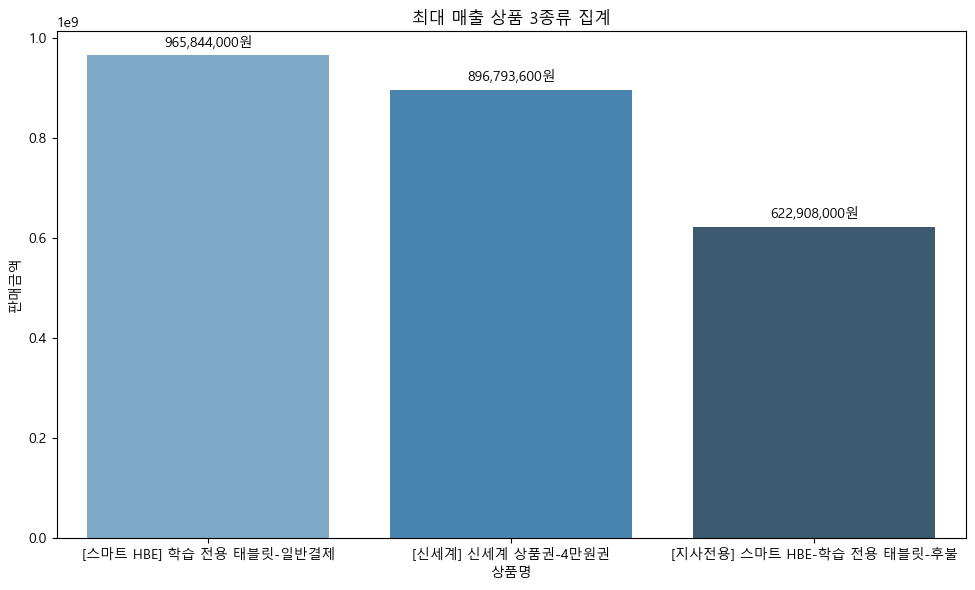

In [55]:

import seaborn as sns
import matplotlib.pyplot as plt

# 상품명 별 매출 집계
grouped_sales = df.groupby('상품명')['판매금액'].sum()

# 매출이 높은 상품 3가지 추출
top_3_sales = grouped_sales.nlargest(3)

# 그래프로 표현
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_3_sales.index, y=top_3_sales.values, palette="Blues_d")

# 각 막대의 상단에 값을 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}원', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('최대 매출 상품 3종류 집계')
plt.xlabel('상품명')
plt.ylabel('판매금액')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [59]:
df = df.dropna(subset=['상품명'])

tablet_count = df[df['상품명'].str.contains('태블릿')].shape[0]
giftcard_count = df[df['상품명'].str.contains('상품권')].shape[0]

print(f"태블릿 포함 데이터: {tablet_count}")
print(f"상품권 포함 데이터: {giftcard_count}")


태블릿 포함 데이터: 6185
상품권 포함 데이터: 31995


C:\Users\Estar\AppData\Local\Temp\ipykernel_18944\393960071.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data['주문수량'], ax=axes[0], palette="Greens_r")
C:\Users\Estar\AppData\Local\Temp\ipykernel_18944\393960071.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data['판매금액'], ax=axes[1], palette="Greens_r")


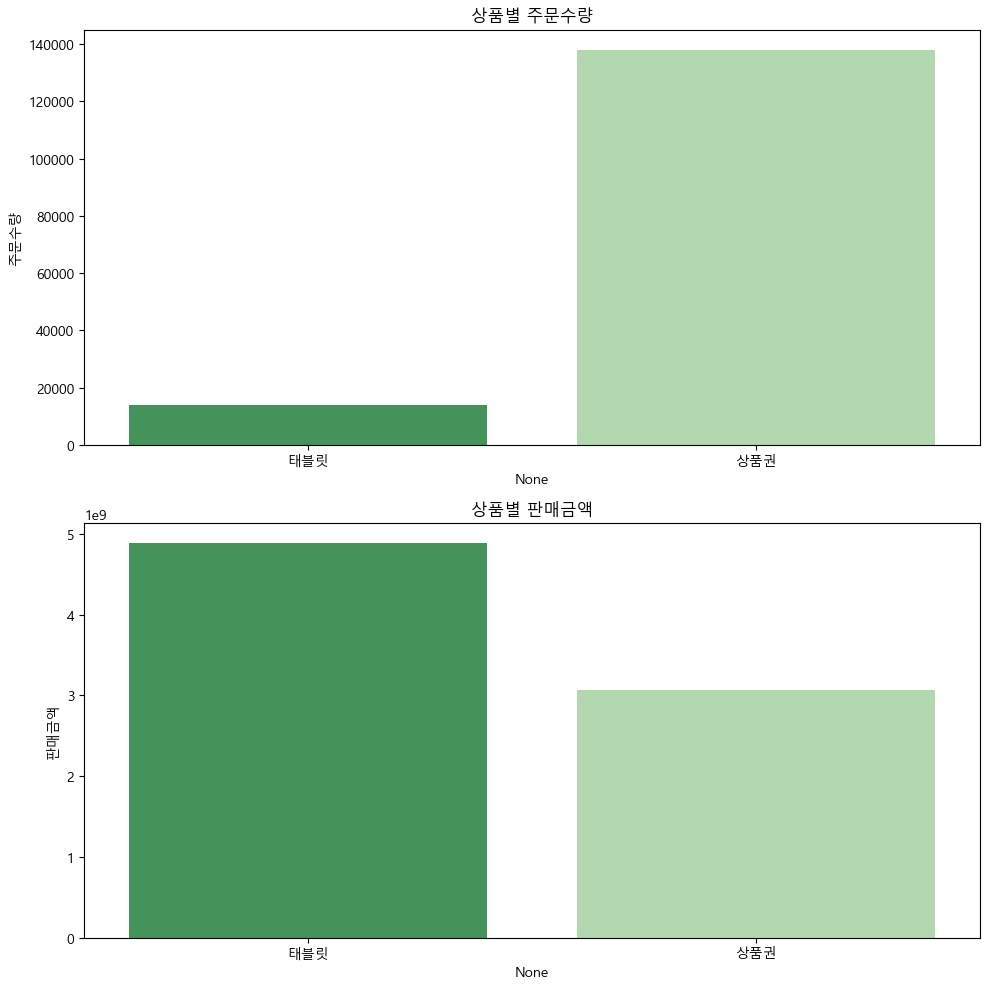

In [50]:

# 태블릿과 상품권이 포함된 상품 필터링 (na=False 추가)
tablet_data = df[df['상품명'].str.contains('태블릿', na=False)]
giftcard_data = df[df['상품명'].str.contains('상품권', na=False)]

# 태블릿과 상품권의 주문수량 및 판매금액 합계 계산
tablet_sum = tablet_data[['주문수량', '판매금액']].sum()
giftcard_sum = giftcard_data[['주문수량', '판매금액']].sum()

# 데이터 프레임 생성
data = pd.DataFrame([tablet_sum, giftcard_sum], index=['태블릿', '상품권'])

# 그래프 그리기
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# 주문수량 그래프
sns.barplot(x=data.index, y=data['주문수량'], ax=axes[0], palette="Greens_r")
axes[0].set_title('상품별 주문수량')
axes[0].set_ylabel('주문수량')

# 판매금액 그래프
sns.barplot(x=data.index, y=data['판매금액'], ax=axes[1], palette="Greens_r")
axes[1].set_title('상품별 판매금액')
axes[1].set_ylabel('판매금액')

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# '처리상태'가 '구매확정'인 데이터만 필터링
df_filtered = df[df['처리상태'] == '구매확정'].copy()

# '할부기간'에서 '개월' 문자 제거하고 숫자로 변환
df_filtered['할부기간'] = df_filtered['할부기간'].str.replace('개월', '').fillna(1).astype(int)

# 빈 데이터 리스트 생성
profit_data_list = []

# 각 행에 대해 처리
for index, row in df_filtered.iterrows():
    for i in range(row['할부기간']):
        profit_data_list.append({
            '날짜': (row['주문일자'] + pd.DateOffset(months=i)).strftime('%m'),  # 연도 정보 제거, 월 정보만 활용
            '순수익': row['판매금액'] / row['할부기간']
        })

# 데이터 리스트를 DataFrame으로 변환
profit_data = pd.DataFrame(profit_data_list)

# 월별로 합산
monthly_profit = profit_data.groupby('날짜').sum()

print(monthly_profit)


             순수익
날짜              
01  6.166663e+08
02  7.822488e+08
03  9.802619e+08
04  6.251648e+08
05  1.060383e+09
06  5.485992e+08
07  5.145700e+08
08  7.297368e+08
09  7.082821e+08
10  6.559767e+08
11  4.514829e+08
12  4.911973e+08


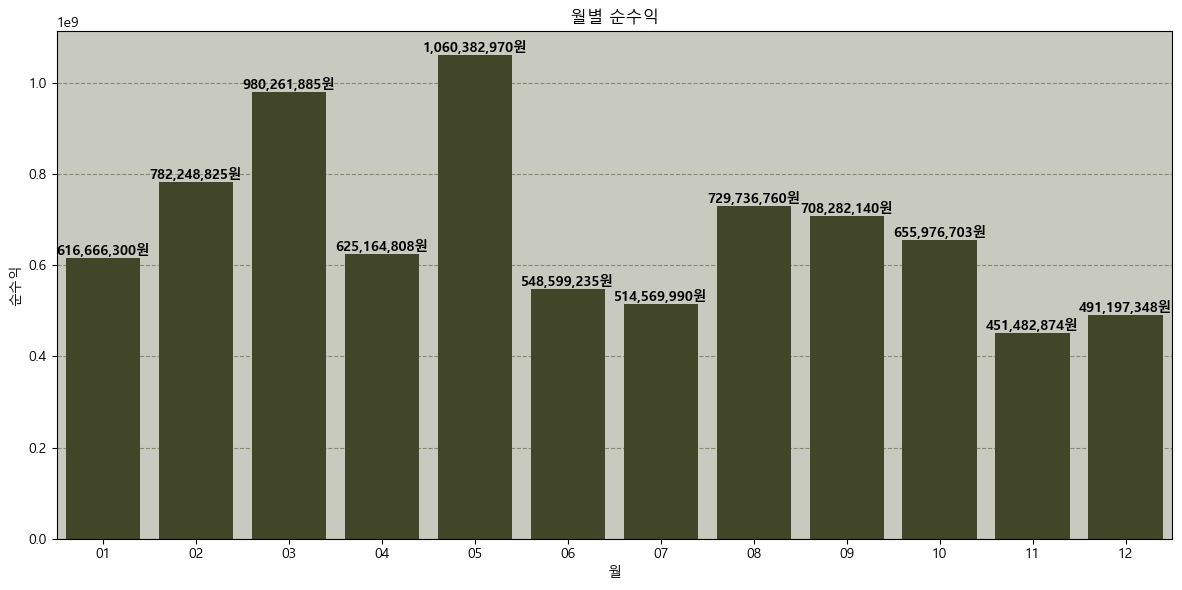

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 월별 순수익 바 차트 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_profit.index, y=monthly_profit['순수익'], color='#464b24')

plt.title('월별 순수익')
plt.xlabel('월')
plt.ylabel('순수익')
plt.xticks(rotation=0)  # x축 라벨 회전 각도 설정 (0도로 설정하여 월이 세로로 보이도록 함)
plt.grid(axis='y', color='#464b24', linestyle='--', alpha=0.5)

ax = plt.gca()
ax.set_facecolor('#464b244a')

# 바 차트 상단에 값을 표시
for index, value in enumerate(monthly_profit['순수익']):
    plt.text(index, value, f'{int(value):,}원', ha='center', va='bottom', fontweight='bold') 

plt.tight_layout()
plt.show()


C:\Users\Estar\AppData\Local\Temp\ipykernel_18944\205145019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dw['주문일자'] = pd.to_datetime(dw['주문일자'])
C:\Users\Estar\AppData\Local\Temp\ipykernel_18944\205145019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dw['월'] = dw['주문일자'].dt.to_period('M')


월     2020-09  2020-10  2020-11  2020-12  2021-01  2021-02  2021-03  2021-04  \
업체명                                                                            
다우기술       11       30      906     1409     1408     1572     1473     1428   

월     2021-05  2021-06  ...  2022-02  2022-03  2022-04  2022-05  2022-06  \
업체명                     ...                                                
다우기술     2439     1979  ...     5553     3709     3877     5842     4996   

월     2022-07  2022-08  2022-09  2022-10  2022-11  
업체명                                                
다우기술     5877     7079     6374     6694     2048  

[1 rows x 27 columns]


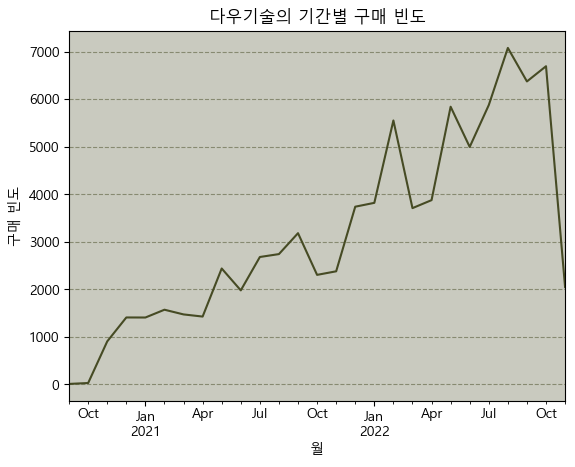

In [47]:
dw = df[df['업체명'] == '다우기술']
# 주문일자를 날짜 형식으로 변환
dw['주문일자'] = pd.to_datetime(dw['주문일자'])

# 월별로 구매 빈도를 계산
dw['월'] = dw['주문일자'].dt.to_period('M')

# 업체별로 그룹화하고 월별 구매 빈도 계산
구매빈도_통계1 = dw.groupby(['업체명','월']).size().unstack().fillna(0)
구매빈도_통계1 = pd.DataFrame(구매빈도_통계1)
print(구매빈도_통계1)
da = dw.groupby(['월']).size()

# 그래프 그리기

ax = plt.gca()
ax.set_facecolor('#464b244a')
da.plot(color='#464b24')
plt.grid(axis='y', color='#464b24', linestyle='--', alpha=0.5)
plt.title(f'다우기술의 기간별 구매 빈도')
plt.xlabel('월')
plt.ylabel('구매 빈도')
plt.show()

C:\Users\Estar\AppData\Local\Temp\ipykernel_18944\3120806288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_data['할부기간'] = recent_data['할부기간'].str.replace('개월', '').fillna(1).astype(int)
C:\Users\Estar\AppData\Local\Temp\ipykernel_18944\3120806288.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_data['순수익'] = recent_data['판매금액'] / recent_data['할부기간']


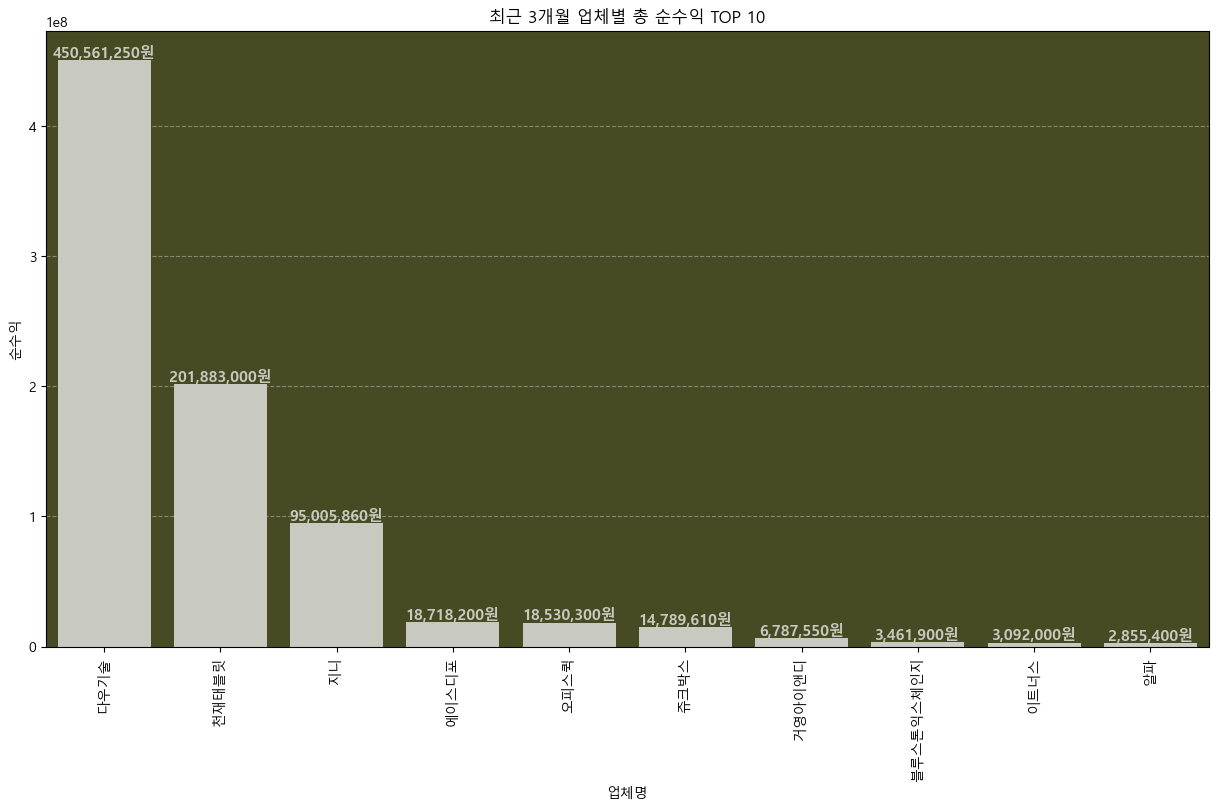

In [41]:
# 1. 주어진 날짜 범위에 해당하는 데이터 필터링
recent_data = df[df['주문일자'].between('2022-09-08','2022-11-09')]

# '할부기간'에서 '개월' 문자 제거하고 숫자로 변환
recent_data['할부기간'] = recent_data['할부기간'].str.replace('개월', '').fillna(1).astype(int)

# 순수익 계산 후 '순수익' 컬럼에 저장
recent_data['순수익'] = recent_data['판매금액'] / recent_data['할부기간']

# 2. '업체명'별로 '순수익' 합산 후 상위 10개 데이터만 추출
grouped_data = recent_data.groupby('업체명')['순수익'].sum().reset_index()
sorted_data = grouped_data.sort_values(by='순수익', ascending=False).head(10)

# 3. 그래프 시각화
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x='업체명', y='순수익', data=sorted_data, color='#c9cabfff')
ax = plt.gca()
ax.set_facecolor('#464b24')

plt.grid(axis='y', color='#c9cabfff', linestyle='--', alpha=0.5)

# 각 바의 상단에 순수익 표시
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height()):,}원', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='#c9cabfff', xytext=(0, 5),
                     textcoords='offset points', fontweight='bold')

plt.title('최근 3개월 업체별 총 순수익 TOP 10')
plt.xlabel('업체명')
plt.ylabel('순수익')
plt.xticks(rotation=90)
plt.show()


In [65]:
# 상품명에 특정 단어가 포함되어 있는지 확인하는 함수
def classify_product(product_name):
    education_keywords = ["교육", "학습", "방학", "교재", "해법", "공부", "교실", "학생", "신학기"]
    for keyword in education_keywords:
        if keyword in product_name:
            return "교육용 상품"
    return "일반 상품"

# "교육용 상품"과 "일반 상품"으로 분류
df['상품 분류'] = df['상품명'].apply(classify_product)

# '업체명', '판매금액', '주문수량', '상품 분류'로 구성된 새로운 표 생성
grouped_df = df.groupby(['업체명', '상품명', '상품 분류','주문일자'])[['판매금액', '주문수량']].sum().reset_index()

# 결과 출력
print(grouped_df)



            업체명                                         상품명  상품 분류  \
0       7321디자인       [7321디자인] Plan B 스터디 플래너 ver.2 (옵션선택)  일반 상품   
1       7321디자인                   [7321디자인] 스탠바이미 카드 (옵션선택)  일반 상품   
2       7321디자인            [7321디자인] 에브리 홀리데이 스티커 6종세트-파티타임  일반 상품   
3       7321디자인            [7321디자인] 에브리 홀리데이 스티커 6종세트-파티타임  일반 상품   
4       7321디자인            [7321디자인] 에브리 홀리데이 스티커 6종세트-파티타임  일반 상품   
...         ...                                         ...    ...   
209252    헬스하우스  [주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함  일반 상품   
209253    헬스하우스  [주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함  일반 상품   
209254    헬스하우스  [주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함  일반 상품   
209255    헬스하우스  [주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함  일반 상품   
209256    헬스하우스  [주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함  일반 상품   

                      주문일자   판매금액  주문수량  
0      2022-10-31 12:22:35  22800     6  
1      2022-11-01 18:43:34   3800     2  
2      2022-10-31 21:23:19   4500

In [67]:
# 결과를 엑셀 파일로 저장
output_filename = '분류된_상품_데이터.xlsx'
grouped_df.to_excel(output_filename, index=False, engine='openpyxl')

print(f"'{output_filename}'로 저장되었습니다.")


'분류된_상품_데이터.xlsx'로 저장되었습니다.


In [66]:
grouped_df

,업체명,상품명,상품 분류,주문일자,판매금액,주문수량
0,7321디자인,[7321디자인] Plan B 스터디 플래너 ver.2 (옵션선택),일반 상품,2022-10-31 12:22:35,22800,6
1,7321디자인,[7321디자인] 스탠바이미 카드 (옵션선택),일반 상품,2022-11-01 18:43:34,3800,2
2,7321디자인,[7321디자인] 에브리 홀리데이 스티커 6종세트-파티타임,일반 상품,2022-10-31 21:23:19,4500,1
3,7321디자인,[7321디자인] 에브리 홀리데이 스티커 6종세트-파티타임,일반 상품,2022-10-31 21:24:24,4500,1
4,7321디자인,[7321디자인] 에브리 홀리데이 스티커 6종세트-파티타임,일반 상품,2022-10-31 21:33:14,4500,1
...,...,...,...,...,...,...
209252,헬스하우스,[주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함,일반 상품,2022-05-12 16:12:47,12900,1
209253,헬스하우스,[주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함,일반 상품,2022-05-13 11:29:17,25800,2
209254,헬스하우스,[주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함,일반 상품,2022-05-14 02:38:23,25800,2
209255,헬스하우스,[주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함,일반 상품,2022-05-14 02:39:40,25800,2


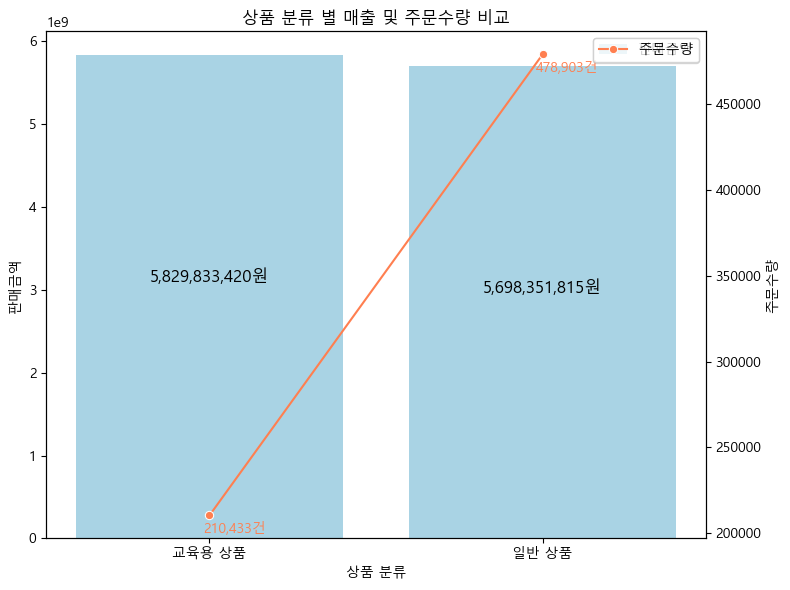

In [102]:
# 상품 분류에 따른 판매금액과 주문수량 집계
summary = df.groupby('상품 분류')[['판매금액', '주문수량']].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))

# 판매금액 그래프
ax = sns.barplot(x='상품 분류', y='판매금액', data=summary, label='판매금액', color='skyblue', alpha=0.8)

# 주문수량 그래프 (두 번째 y축 사용)
ax2 = ax.twinx()
sns.lineplot(x='상품 분류', y='주문수량', data=summary, label='주문수량', ax=ax2, color='coral', marker='o')

# 막대 상단에 판매금액 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}원', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, -160),
                textcoords='offset points',
                fontsize=12)

# 선 상단에 주문수량 표시
for i, value in enumerate(summary['주문수량']):
    ax2.annotate(f'{value:,}건', 
                 (i, value),
                 ha='center', va='center',
                 xytext=(18, -10),
                 textcoords='offset points',
                 fontsize=10, color='coral')

plt.title('상품 분류 별 매출 및 주문수량 비교')
plt.xlabel('상품분류')
plt.ylabel('판매금액')
ax2.set_ylabel('주문수량')
plt.tight_layout()
plt.show()
